### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [3]:
### Data Collection
import pandas_datareader as pdr
import pandas as pd
key="17b24a62f4142385ad1b2006866ceacb435658cb"

In [5]:
df = pdr.get_data_tiingo('TSLA', api_key=key)
#df= pd.read_csv("C:/Users/asus/Desktop/WORK/final project/8th sem/AAPL.csv")

In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
#df=pd.read_csv('AAPL.csv')
#f=pd.read_csv('C:/Users/asus/Desktop/WORK/final project/8th sem/AAPL.csv')

In [9]:
df.head()

close    high       low    open    volume  \
symbol date                                                                    
TSLA   2016-04-04 00:00:00+00:00  246.99  252.12  243.6400  249.12  13475327   
       2016-04-05 00:00:00+00:00  255.47  256.56  240.0000  240.50   9948699   
       2016-04-06 00:00:00+00:00  265.42  267.74  253.4500  253.97  11705479   
       2016-04-07 00:00:00+00:00  257.20  269.34  254.5100  266.45   8856171   
       2016-04-08 00:00:00+00:00  250.07  260.82  248.0201  260.50   7363935   

                                  adjClose  adjHigh    adjLow  adjOpen  \
symbol date                                                              
TSLA   2016-04-04 00:00:00+00:00    49.398   50.424  48.72800   49.824   
       2016-04-05 00:00:00+00:00    51.094   51.312  48.00000   48.100   
       2016-04-06 00:00:00+00:00    53.084   53.548  50.69000   50.794   
       2016-04-07 00:00:00+00:00    51.440   53.868  50.90200   53.290   
       2016-04-08 00:00:00+00:00    50.014   52.164  49.60402   52.100   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2016-04-04 00:00:00+00:00   67376635      0.0          1.0  
       2016-04-05 00:00:00+00:00   49743495      0.0          1.0  
       2016-04-06 00:00:00+00:00   58527395      0.0          1.0  
       2016-04-07 00:00:00+00:00   44280855      0.0          1.0  
       2016-04-08 00:00:00+00:00   36819675      0.0          1.0

In [10]:
df.tail()

close      high     low    open    volume  \
symbol date                                                                    
TSLA   2021-03-26 00:00:00+00:00  618.71  643.8200  599.89  641.87  33852827   
       2021-03-29 00:00:00+00:00  611.29  616.4800  596.02  615.64  28636985   
       2021-03-30 00:00:00+00:00  635.62  637.6600  591.01  601.75  39432359   
       2021-03-31 00:00:00+00:00  667.93  672.0000  641.11  646.62  33337288   
       2021-04-01 00:00:00+00:00  661.75  692.4203  659.42  688.37  35298378   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
TSLA   2021-03-26 00:00:00+00:00    618.71  643.8200  599.89   641.87   
       2021-03-29 00:00:00+00:00    611.29  616.4800  596.02   615.64   
       2021-03-30 00:00:00+00:00    635.62  637.6600  591.01   601.75   
       2021-03-31 00:00:00+00:00    667.93  672.0000  641.11   646.62   
       2021-04-01 00:00:00+00:00    661.75  692.4203  659.42   688.37   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2021-03-26 00:00:00+00:00   33852827      0.0          1.0  
       2021-03-29 00:00:00+00:00   28636985      0.0          1.0  
       2021-03-30 00:00:00+00:00   39432359      0.0          1.0  
       2021-03-31 00:00:00+00:00   33337288      0.0          1.0  
       2021-04-01 00:00:00+00:00   35298378      0.0          1.0

In [11]:
df1=df.reset_index()['close']

In [12]:
df1

0       246.99
1       255.47
2       265.42
3       257.20
4       250.07
         ...  
1254    618.71
1255    611.29
1256    635.62
1257    667.93
1258    661.75
Name: close, Length: 1259, dtype: float64

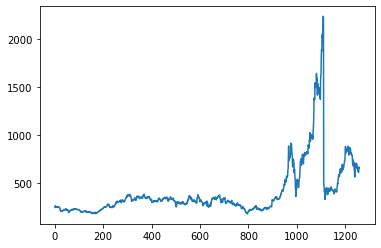

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [16]:
import numpy as np

In [18]:
df1

0       246.99
1       255.47
2       265.42
3       257.20
4       250.07
         ...  
1254    618.71
1255    611.29
1256    635.62
1257    667.93
1258    661.75
Name: close, Length: 1259, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.03302294]
 [0.03713989]
 [0.0419705 ]
 ...
 [0.22169843]
 [0.23738458]
 [0.23438425]]


In [22]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(818, 441)

In [25]:
train_data

array([[0.03302294],
       [0.03713989],
       [0.0419705 ],
       [0.03797978],
       [0.03451825],
       [0.03444543],
       [0.0334259 ],
       [0.03668353],
       [0.03538727],
       [0.03667382],
       [0.03636796],
       [0.03320743],
       [0.0344697 ],
       [0.03365408],
       [0.03630485],
       [0.03536785],
       [0.03629999],
       [0.03519793],
       [0.0333725 ],
       [0.02999835],
       [0.03050326],
       [0.02590082],
       [0.02116245],
       [0.01580751],
       [0.01745818],
       [0.01454039],
       [0.01442873],
       [0.01455981],
       [0.01374419],
       [0.0139044 ],
       [0.01423453],
       [0.01247221],
       [0.01563274],
       [0.01759411],
       [0.02005554],
       [0.01808446],
       [0.01890493],
       [0.0197157 ],
       [0.02240531],
       [0.02139549],
       [0.02148773],
       [0.01970599],
       [0.01941469],
       [0.01942926],
       [0.02024974],
       [0.02591053],
       [0.02745439],
       [0.024

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 491ms/step - loss: 0.0014 - val_loss: 0.0509
Epoch 2/100
12/12 [==============================] - 2s 137ms/step - loss: 3.5771e-04 - val_loss: 0.0350
Epoch 3/100
12/12 [==============================] - 2s 139ms/step - loss: 2.3638e-04 - val_loss: 0.0184
Epoch 4/100
12/12 [==============================] - 2s 141ms/step - loss: 1.5137e-04 - val_loss: 0.0181
Epoch 5/100
12/12 [==============================] - 2s 146ms/step - loss: 1.1197e-04 - val_loss: 0.0178
Epoch 6/100
12/12 [==============================] - 2s 143ms/step - loss: 1.1683e-04 - val_loss: 0.0160
Epoch 7/100
12/12 [==============================] - 2s 138ms/step - loss: 1.0947e-04 - val_loss: 0.0161
Epoch 8/100
12/12 [==============================] - 2s 141ms/step - loss: 1.1188e-04 - val_loss: 0.0152
Epoch 9/100
12/12 [==============================] - 2s 143ms/step - loss: 1.0627e-04 - val_loss: 0.0148
Epoch 10/100
12/12 [==============================] - 2s 1

In [37]:
import tensorflow as tf

In [38]:
tf.__version__

'2.4.1'

In [41]:
# prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [42]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.005047446238750852

In [45]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.10461791996848523

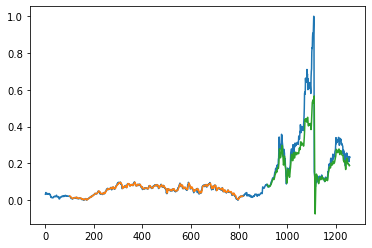

In [46]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [59]:
len(test_data)

441

In [61]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.12184796434570684,
 0.11762906718193207,
 0.11233723989940676,
 0.11562399867947064,
 0.11301692413752927,
 0.11143423084018682,
 0.11123518045616522,
 0.1275087630717844,
 0.14937032110225365,
 0.15550204390760178,
 0.15081222266455643,
 0.16646437969103497,
 0.18274281719406923,
 0.19178261756109877,
 0.19749196516132794,
 0.18867548961539582,
 0.19700647641981184,
 0.1892677858800455,
 0.20119138937168046,
 0.2039392556486615,
 0.22467933468622864,
 0.22862150326733927,
 0.206580314402509,
 0.2175475050733574,
 0.20925535736826267,
 0.22374234141510263,
 0.22054782549592677,
 0.21545990348483818,
 0.23154414549126606,
 0.25052675528454493,
 0.22861179349250893,
 0.22398994067327582,
 0.22672809717542652,
 0.23439396440396548,
 0.2353261027876764,
 0.23644272689316337,
 0.2504199477614114,
 0.2557069201565216,
 0.2674071988270592,
 0.2699997087067551,
 0.28013185874219576,
 0.30929031255765177,
 0.34035188223985086,
 0.3069356921612988,
 0.32550563652428904,
 0.3279185155696239,
 

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.20768203]
101
1 day input [0.11762907 0.11233724 0.115624   0.11301692 0.11143423 0.11123518
 0.12750876 0.14937032 0.15550204 0.15081222 0.16646438 0.18274282
 0.19178262 0.19749197 0.18867549 0.19700648 0.18926779 0.20119139
 0.20393926 0.22467933 0.2286215  0.20658031 0.21754751 0.20925536
 0.22374234 0.22054783 0.2154599  0.23154415 0.25052676 0.22861179
 0.22398994 0.2267281  0.23439396 0.2353261  0.23644273 0.25041995
 0.25570692 0.2674072  0.26999971 0.28013186 0.30929031 0.34035188
 0.30693569 0.32550564 0.32791852 0.32335007 0.31420346 0.3231316
 0.32599598 0.32334521 0.32414627 0.34073056 0.34184233 0.33265203
 0.31870394 0.29836196 0.32083038 0.3368418  0.32805445 0.32577266
 0.32686015 0.33229277 0.32551535 0.30384313 0.30716387 0.30932915
 0.29966793 0.30060492 0.29537621 0.29242443 0.25999379 0.25239103
 0.27335444 0.24432221 0.24105972 0.26190176 0.24637097 0.23023333
 0.2148142  0.20341007 0.18644224 0.24012759 0.23744769 0.25276
 0.24991018 0.25680898 0.2417297  0.2

8 day output [[0.11746208]]
9 day input [0.15550204 0.15081222 0.16646438 0.18274282 0.19178262 0.19749197
 0.18867549 0.19700648 0.18926779 0.20119139 0.20393926 0.22467933
 0.2286215  0.20658031 0.21754751 0.20925536 0.22374234 0.22054783
 0.2154599  0.23154415 0.25052676 0.22861179 0.22398994 0.2267281
 0.23439396 0.2353261  0.23644273 0.25041995 0.25570692 0.2674072
 0.26999971 0.28013186 0.30929031 0.34035188 0.30693569 0.32550564
 0.32791852 0.32335007 0.31420346 0.3231316  0.32599598 0.32334521
 0.32414627 0.34073056 0.34184233 0.33265203 0.31870394 0.29836196
 0.32083038 0.3368418  0.32805445 0.32577266 0.32686015 0.33229277
 0.32551535 0.30384313 0.30716387 0.30932915 0.29966793 0.30060492
 0.29537621 0.29242443 0.25999379 0.25239103 0.27335444 0.24432221
 0.24105972 0.26190176 0.24637097 0.23023333 0.2148142  0.20341007
 0.18644224 0.24012759 0.23744769 0.25276    0.24991018 0.25680898
 0.2417297  0.25383293 0.23021391 0.23104409 0.23838954 0.23458331
 0.21910107 0.22401422 0

16 day output [[0.10315734]]
17 day input [0.18926779 0.20119139 0.20393926 0.22467933 0.2286215  0.20658031
 0.21754751 0.20925536 0.22374234 0.22054783 0.2154599  0.23154415
 0.25052676 0.22861179 0.22398994 0.2267281  0.23439396 0.2353261
 0.23644273 0.25041995 0.25570692 0.2674072  0.26999971 0.28013186
 0.30929031 0.34035188 0.30693569 0.32550564 0.32791852 0.32335007
 0.31420346 0.3231316  0.32599598 0.32334521 0.32414627 0.34073056
 0.34184233 0.33265203 0.31870394 0.29836196 0.32083038 0.3368418
 0.32805445 0.32577266 0.32686015 0.33229277 0.32551535 0.30384313
 0.30716387 0.30932915 0.29966793 0.30060492 0.29537621 0.29242443
 0.25999379 0.25239103 0.27335444 0.24432221 0.24105972 0.26190176
 0.24637097 0.23023333 0.2148142  0.20341007 0.18644224 0.24012759
 0.23744769 0.25276    0.24991018 0.25680898 0.2417297  0.25383293
 0.23021391 0.23104409 0.23838954 0.23458331 0.21910107 0.22401422
 0.21348882 0.20988649 0.22169843 0.23738458 0.23438425 0.20768203
 0.20128477 0.18769418

24 day output [[0.09108765]]
25 day input [0.22374234 0.22054783 0.2154599  0.23154415 0.25052676 0.22861179
 0.22398994 0.2267281  0.23439396 0.2353261  0.23644273 0.25041995
 0.25570692 0.2674072  0.26999971 0.28013186 0.30929031 0.34035188
 0.30693569 0.32550564 0.32791852 0.32335007 0.31420346 0.3231316
 0.32599598 0.32334521 0.32414627 0.34073056 0.34184233 0.33265203
 0.31870394 0.29836196 0.32083038 0.3368418  0.32805445 0.32577266
 0.32686015 0.33229277 0.32551535 0.30384313 0.30716387 0.30932915
 0.29966793 0.30060492 0.29537621 0.29242443 0.25999379 0.25239103
 0.27335444 0.24432221 0.24105972 0.26190176 0.24637097 0.23023333
 0.2148142  0.20341007 0.18644224 0.24012759 0.23744769 0.25276
 0.24991018 0.25680898 0.2417297  0.25383293 0.23021391 0.23104409
 0.23838954 0.23458331 0.21910107 0.22401422 0.21348882 0.20988649
 0.22169843 0.23738458 0.23438425 0.20768203 0.20128477 0.18769418
 0.17227635 0.15737887 0.1440613  0.13287136 0.12402617 0.11746208
 0.11289966 0.10992772 0

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

1259

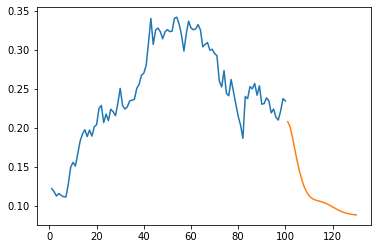

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

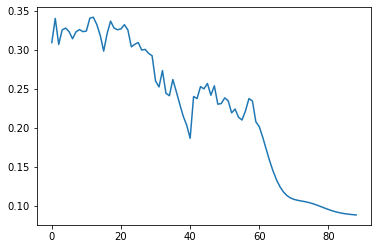

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

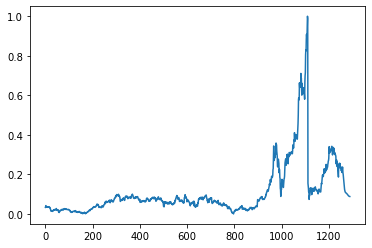

In [58]:
plt.plot(df3)